In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

crimes = pd.read_csv("Crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})


C:\Users\Brookes Hire\AppData\Local\Temp\ipykernel_14876\2027195599.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crimes = pd.read_csv("Crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
C:\Users\Brookes Hire\AppData\Local\Temp\ipykernel_14876\2027195599.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crimes = pd.read_csv("Crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})


In [61]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196682 entries, 0 to 196681
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DR_NO           196682 non-null  int64         
 1   Date Rptd       196682 non-null  datetime64[ns]
 2   DATE OCC        196682 non-null  datetime64[ns]
 3   TIME OCC        196682 non-null  object        
 4   AREA            196682 non-null  int64         
 5   AREA NAME       196682 non-null  object        
 6   Rpt Dist No     196682 non-null  int64         
 7   Part 1-2        196682 non-null  int64         
 8   Crm Cd          196682 non-null  int64         
 9   Crm Cd Desc     196682 non-null  object        
 10  Mocodes         168893 non-null  object        
 11  Vict Age        196682 non-null  int64         
 12  Vict Sex        170111 non-null  object        
 13  Vict Descent    170107 non-null  object        
 14  Premis Cd       196679 non-null  flo

In [62]:
crimes['TIME OCC'].dropna()

0         2030
1         1610
2         1346
3         1330
4         1920
          ... 
196677    1500
196678    1040
196679    1230
196680    1900
196681     550
Name: TIME OCC, Length: 196682, dtype: object

In [63]:
crimes["HOUR OCC"] = crimes["TIME OCC"].apply(lambda x: str(x)[:-2])
crimes['HOUR OCC']

0         20
1         16
2         13
3         13
4         19
          ..
196677    15
196678    10
196679    12
196680    19
196681     5
Name: HOUR OCC, Length: 196682, dtype: object

In [64]:
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,HOUR OCC
0,231909660,2023-05-23,2020-05-23,2030,19,Mission,1934,2,354,THEFT OF IDENTITY,...,Invest Cont,354.0,NaN,NaN,NaN,11100 ORION AV,NaN,34.2718,-118.4715,20
1,201811570,2020-05-23,2020-05-23,1610,18,Southeast,1801,2,624,BATTERY - SIMPLE ASSAULT,...,Adult Arrest,624.0,NaN,NaN,NaN,MANCHESTER AV,MAIN ST,33.9555,-118.2871,16
2,201311277,2020-05-23,2020-05-23,1346,13,Newton,1362,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,Invest Cont,230.0,998.0,NaN,NaN,4900 S SAN PEDRO ST,NaN,33.9985,-118.2696,13
3,200710724,2020-06-19,2020-05-23,1330,7,Wilshire,705,1,310,BURGLARY,...,Invest Cont,310.0,NaN,NaN,NaN,600 N ALTA VISTA BL,NaN,34.0819,-118.3474,13
4,200709574,2020-05-23,2020-05-23,1920,7,Wilshire,732,1,210,ROBBERY,...,Adult Arrest,210.0,NaN,NaN,NaN,6100 WILSHIRE BL,NaN,34.0665,-118.3662,19


In [65]:
crimes["HOUR OCC"].unique()

array(['20', '16', '13', '19', '17', '7', '8', '15', '12', '9', '6', '',
       '10', '2', '11', '21', '1', '4', '14', '18', '3', '22', '23', '5'],
      dtype=object)

In [66]:
crimes['HOUR OCC'] = crimes['HOUR OCC'].replace('','0')
crimes["HOUR OCC"].unique()

array(['20', '16', '13', '19', '17', '7', '8', '15', '12', '9', '6', '0',
       '10', '2', '11', '21', '1', '4', '14', '18', '3', '22', '23', '5'],
      dtype=object)

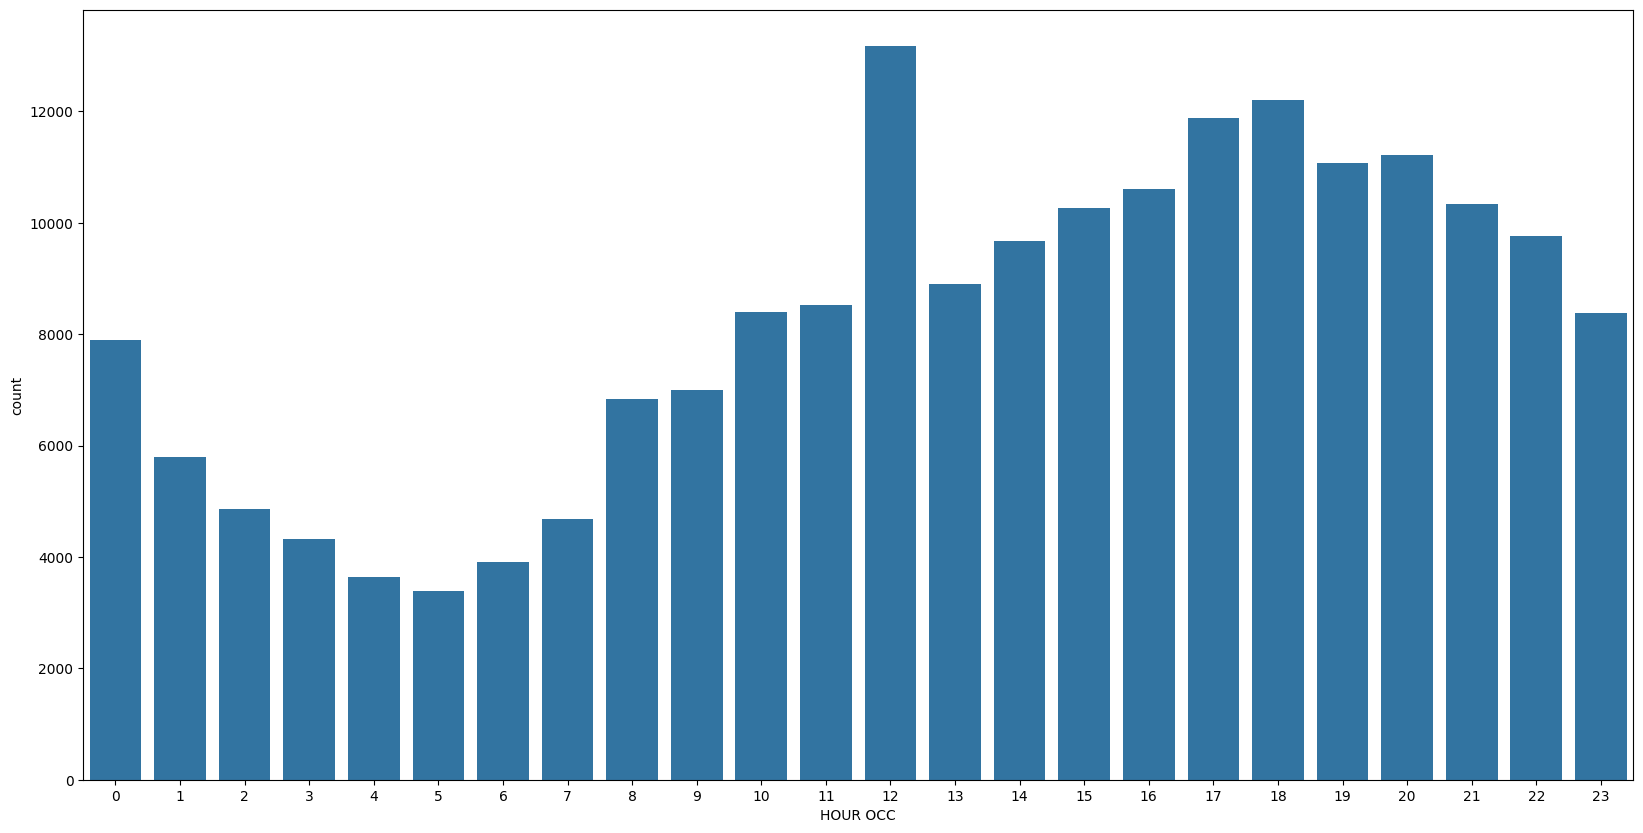

In [67]:
crimes['HOUR OCC'] = crimes['HOUR OCC'].astype(int).sort_values()
plt.figure(figsize = (20,10))
sns.countplot(data=crimes, x="HOUR OCC")
plt.show()

In [68]:
peak_crime_hour = 12

We can see from the Vizualization above that the largest volume of crime occurs at Midday.

In [69]:
night_time = crimes[crimes["HOUR OCC"].isin([22,23,0,1,2,3])]


In [70]:
# Group by "AREA NAME" and count occurrences, filtering for the largest value and saving the "AREA NAME"
peak_night_crime_location = night_time.groupby("AREA NAME", 
                                               as_index=False)["HOUR OCC"].count().sort_values("HOUR OCC",
                                                                                               ascending=False).iloc[0]["AREA NAME"]
# Print the peak night crime location
print(f"The area with the largest volume of night crime is {peak_night_crime_location}.")

The area with the largest volume of night crime is 77th Street.


In [71]:
age_bins = [0, 17, 25, 34, 44, 54, 64, np.inf]
age_labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]

In [72]:

# Add a new column using pd.cut() to bin values into discrete intervals
crimes["Age Bracket"] = pd.cut(crimes["Vict Age"],
                               bins=age_bins,
                               labels=age_labels)

In [73]:
# Find the category with the largest frequency
victim_ages = crimes["Age Bracket"].value_counts()
print(victim_ages)

Age Bracket
26-34    37324
35-44    32539
45-54    23535
18-25    22304
55-64    16896
65+      10760
0-17      4548
Name: count, dtype: int64


Shows the victim age category with the largest frequency.